In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
from ucimlrepo import fetch_ucirepo #https://github.com/uci-ml-repo/ucimlrepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original.copy()
df.shape

(303, 14)

In [4]:
df_clean = df.dropna().copy()

df_clean['num'] = (df_clean['num'] > 0).astype(int)

df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [5]:
X = df_clean.drop(columns=['num'])
y = df_clean['num']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
print(f"Test Dəqiqliyi (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Dəqiqliyi (Accuracy): 0.8833

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



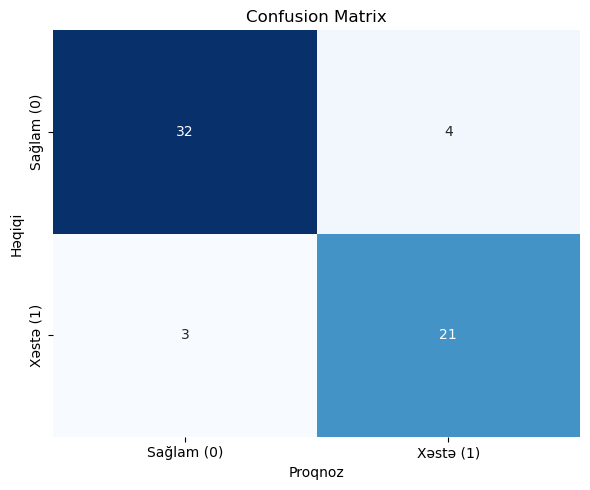

In [10]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sağlam (0)', 'Xəstə (1)'],
            yticklabels=['Sağlam (0)', 'Xəstə (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Proqnoz')
plt.ylabel('Həqiqi')
plt.tight_layout()
plt.show()

/tmp/ipykernel_133204/3985807003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="viridis")


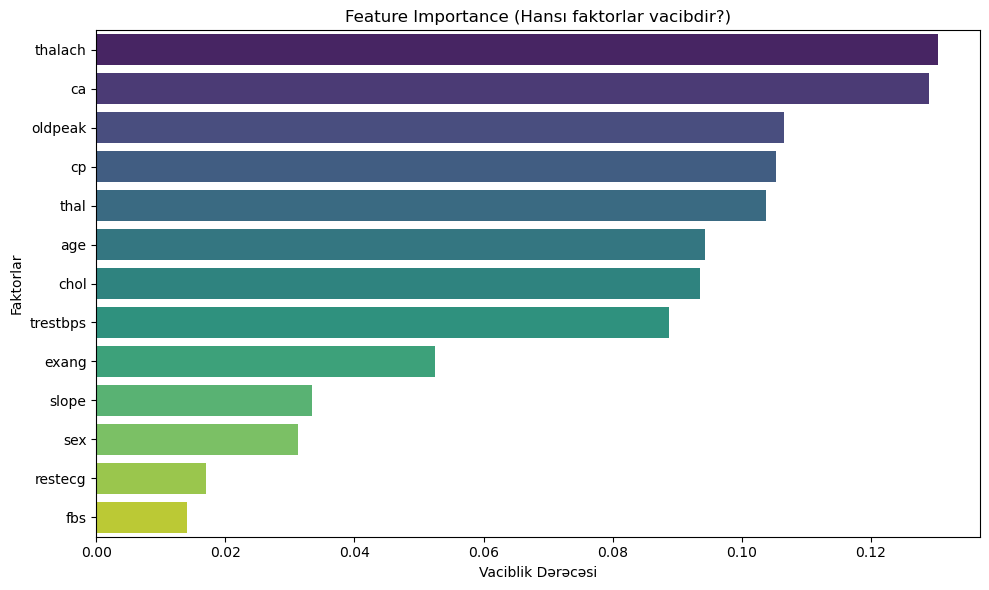

In [11]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="viridis")
plt.title('Feature Importance (Hansı faktorlar vacibdir?)')
plt.xlabel('Vaciblik Dərəcəsi')
plt.ylabel('Faktorlar')
plt.tight_layout()
plt.show()

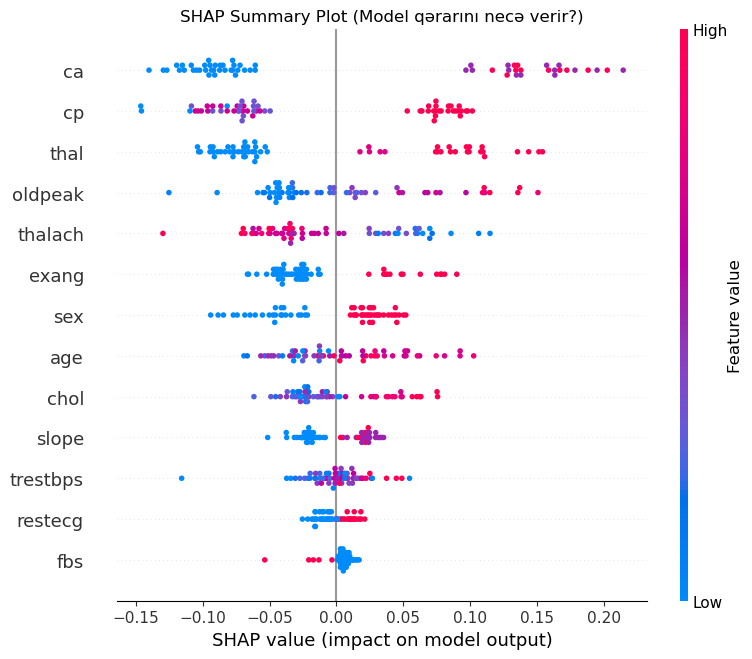

In [12]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap_values_class1 = shap_values[:, :, 1]

plt.figure(figsize=(10, 8))
plt.title("SHAP Summary Plot (Model qərarını necə verir?)")
shap.summary_plot(shap_values_class1, X_test, show=True)